In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [2]:
PATH = "../../data/finals_all_0106"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [3]:
file_data = []
diff_means = []
diff_program_means_dict = {'none': [], 'windup': [], 'getpixel': [], 'bitblt': [], 'getdbits': []}
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    try:
        mean = data_in.query("fw != -1")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
            diff_program_means_dict[data_in['program'][1]].append(mean)
    except:
        #print(data_in, file)
        pass
    file_data.append(data_in)
    
data_original = pd.concat(file_data)

In [4]:
data_original['ete_upper'] = data_original['ete_upper'] / 1000
data_original['ete_lower'] = data_original['ete_lower'] / 1000
data_original['fw'] = data_original['fw'] / 1000
data_original['diff'] = data_original['diff'] / 1000

data = data_original
data = data[data['fullscreen'] == 'fullscreen']
data = data[data['program'] != 'bitblt']
data = data[data['program'] != 'getdbits']
data = data[data['program'] != 'none']
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11.810,14.128,5.701,6.109
1,1,1,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,12.160,14.305,6.129,6.031
2,2,2,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10.772,13.260,4.799,5.973
3,3,3,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11.461,13.775,5.455,6.006
4,4,4,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10.772,12.916,7.094,3.678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43.989,0.338,40.566,3.423
196,196,196,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,41.916,0.509,38.535,3.381
197,197,197,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43.320,0.346,39.826,3.494
198,198,198,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,44.345,0.689,40.669,3.676


In [5]:
COLOR_GLUTROT = '#DA3C43'
COLOR_HEIDENELKE = '#9C004B'

COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_GREEN = '#7dff1a'
COLOR_DARKGREEN = '#4FB800'

COLOR_OCKER_ANDI = '#ebb300'
COLOR_OCKER = '#EC7F00'

COLOR_NONE = '#8E8E8D'

PALETTE_LIGHT = [COLOR_BLUE, COLOR_GREEN, COLOR_GLUTROT, COLOR_OCKER_ANDI]
PALETTE_DARK = [COLOR_DARKBLUE, COLOR_DARKGREEN, COLOR_HEIDENELKE, COLOR_OCKER]

In [6]:
data_cleaned = data[data['diff'] > 0]
data_cleaned = data_cleaned[data_cleaned['fw'] > 0]

In [7]:
# fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))
# axs[0].tick_params(axis='both', labelsize=20)
# axs[1].tick_params(axis='both', labelsize=20)

# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# axs[0].set_ylim(-0.5, len(data_cleaned['framework'].unique()) - 0.5)
# axs[1].set_ylim(-0.5, len(data_cleaned['framework'].unique()) - 0.5)

# dodge = 0.6
# plot = sns.stripplot(ax=axs[1], data=data_cleaned[data_cleaned['program'] == 'getpixel'], x='fw', y='framework', hue='complexity', size=1.5, dodge=dodge, hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_LIGHT, legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[1], data=data_cleaned[data_cleaned['program'] == 'getpixel'], x='fw', y='framework', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_DARK, dodge=dodge, join=False, errorbar='sd', markersize=6, zorder=2)
# plot = sns.stripplot(ax=axs[0], data=data_cleaned[data_cleaned['program'] == 'windup'], x='fw', y='framework', hue='complexity', size=1.5, dodge=dodge, hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_LIGHT, legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[0], data=data_cleaned[data_cleaned['program'] == 'windup'], x='fw', y='framework', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_DARK, dodge=dodge, join=False, errorbar='sd', markersize=6, zorder=2, legend=False)

# # increase label size
# axs[0].set_xlabel('framework latency (ms)\nmeasured with DEKSDUP', fontsize=28)
# axs[1].set_xlabel('framework latency (ms)\nmeasured with GETPIXEL', fontsize=28)
# axs[0].xaxis.labelpad = 20
# axs[1].xaxis.labelpad = 20
# axs[0].set_ylabel('')

# plot.set_xlim(left=0, right=150)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

In [8]:
# fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))
# axs[0].tick_params(axis='both', labelsize=20)
# axs[1].tick_params(axis='both', labelsize=20)

# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
# axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# dodge = 0.6
# plot = sns.swarmplot(ax=axs[1], data=data[data['program'] == 'getpixel'], x='fw', y='framework', hue='complexity', size=1.5, dodge=dodge, hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_LIGHT, legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[1], data=data[data['program'] == 'getpixel'], x='fw', y='framework', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_DARK, dodge=dodge, join=False, errorbar='sd', markersize=6, zorder=2)
# plot = sns.swarmplot(ax=axs[0], data=data[data['program'] == 'windup'], x='fw', y='framework', hue='complexity', size=1.5, dodge=dodge, hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_LIGHT, legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[0], data=data[data['program'] == 'windup'], x='fw', y='framework', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_DARK, dodge=dodge, join=False, errorbar='sd', markersize=6, zorder=2, legend=False)

# # increase label size
# axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
# axs[1].set_xlabel('framework latency (ms)', fontsize=28)
# axs[0].xaxis.labelpad = 20
# axs[1].xaxis.labelpad = 20
# axs[0].set_ylabel('')

# plot.set_xlim(0, 100)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

[<matplotlib.lines.Line2D object at 0x00000276896C17C0>, <matplotlib.lines.Line2D object at 0x000002768954CB60>, <matplotlib.lines.Line2D object at 0x000002768952A780>, <matplotlib.lines.Line2D object at 0x00000276892DB8F0>, <matplotlib.lines.Line2D object at 0x00000276895AF5F0>, <matplotlib.lines.Line2D object at 0x000002769165CC50>, <matplotlib.lines.Line2D object at 0x0000027689773F80>, <matplotlib.lines.Line2D object at 0x000002768954F260>]
['default', 'image', 'rects', '3D', 'default', 'image', 'rects', '3D']


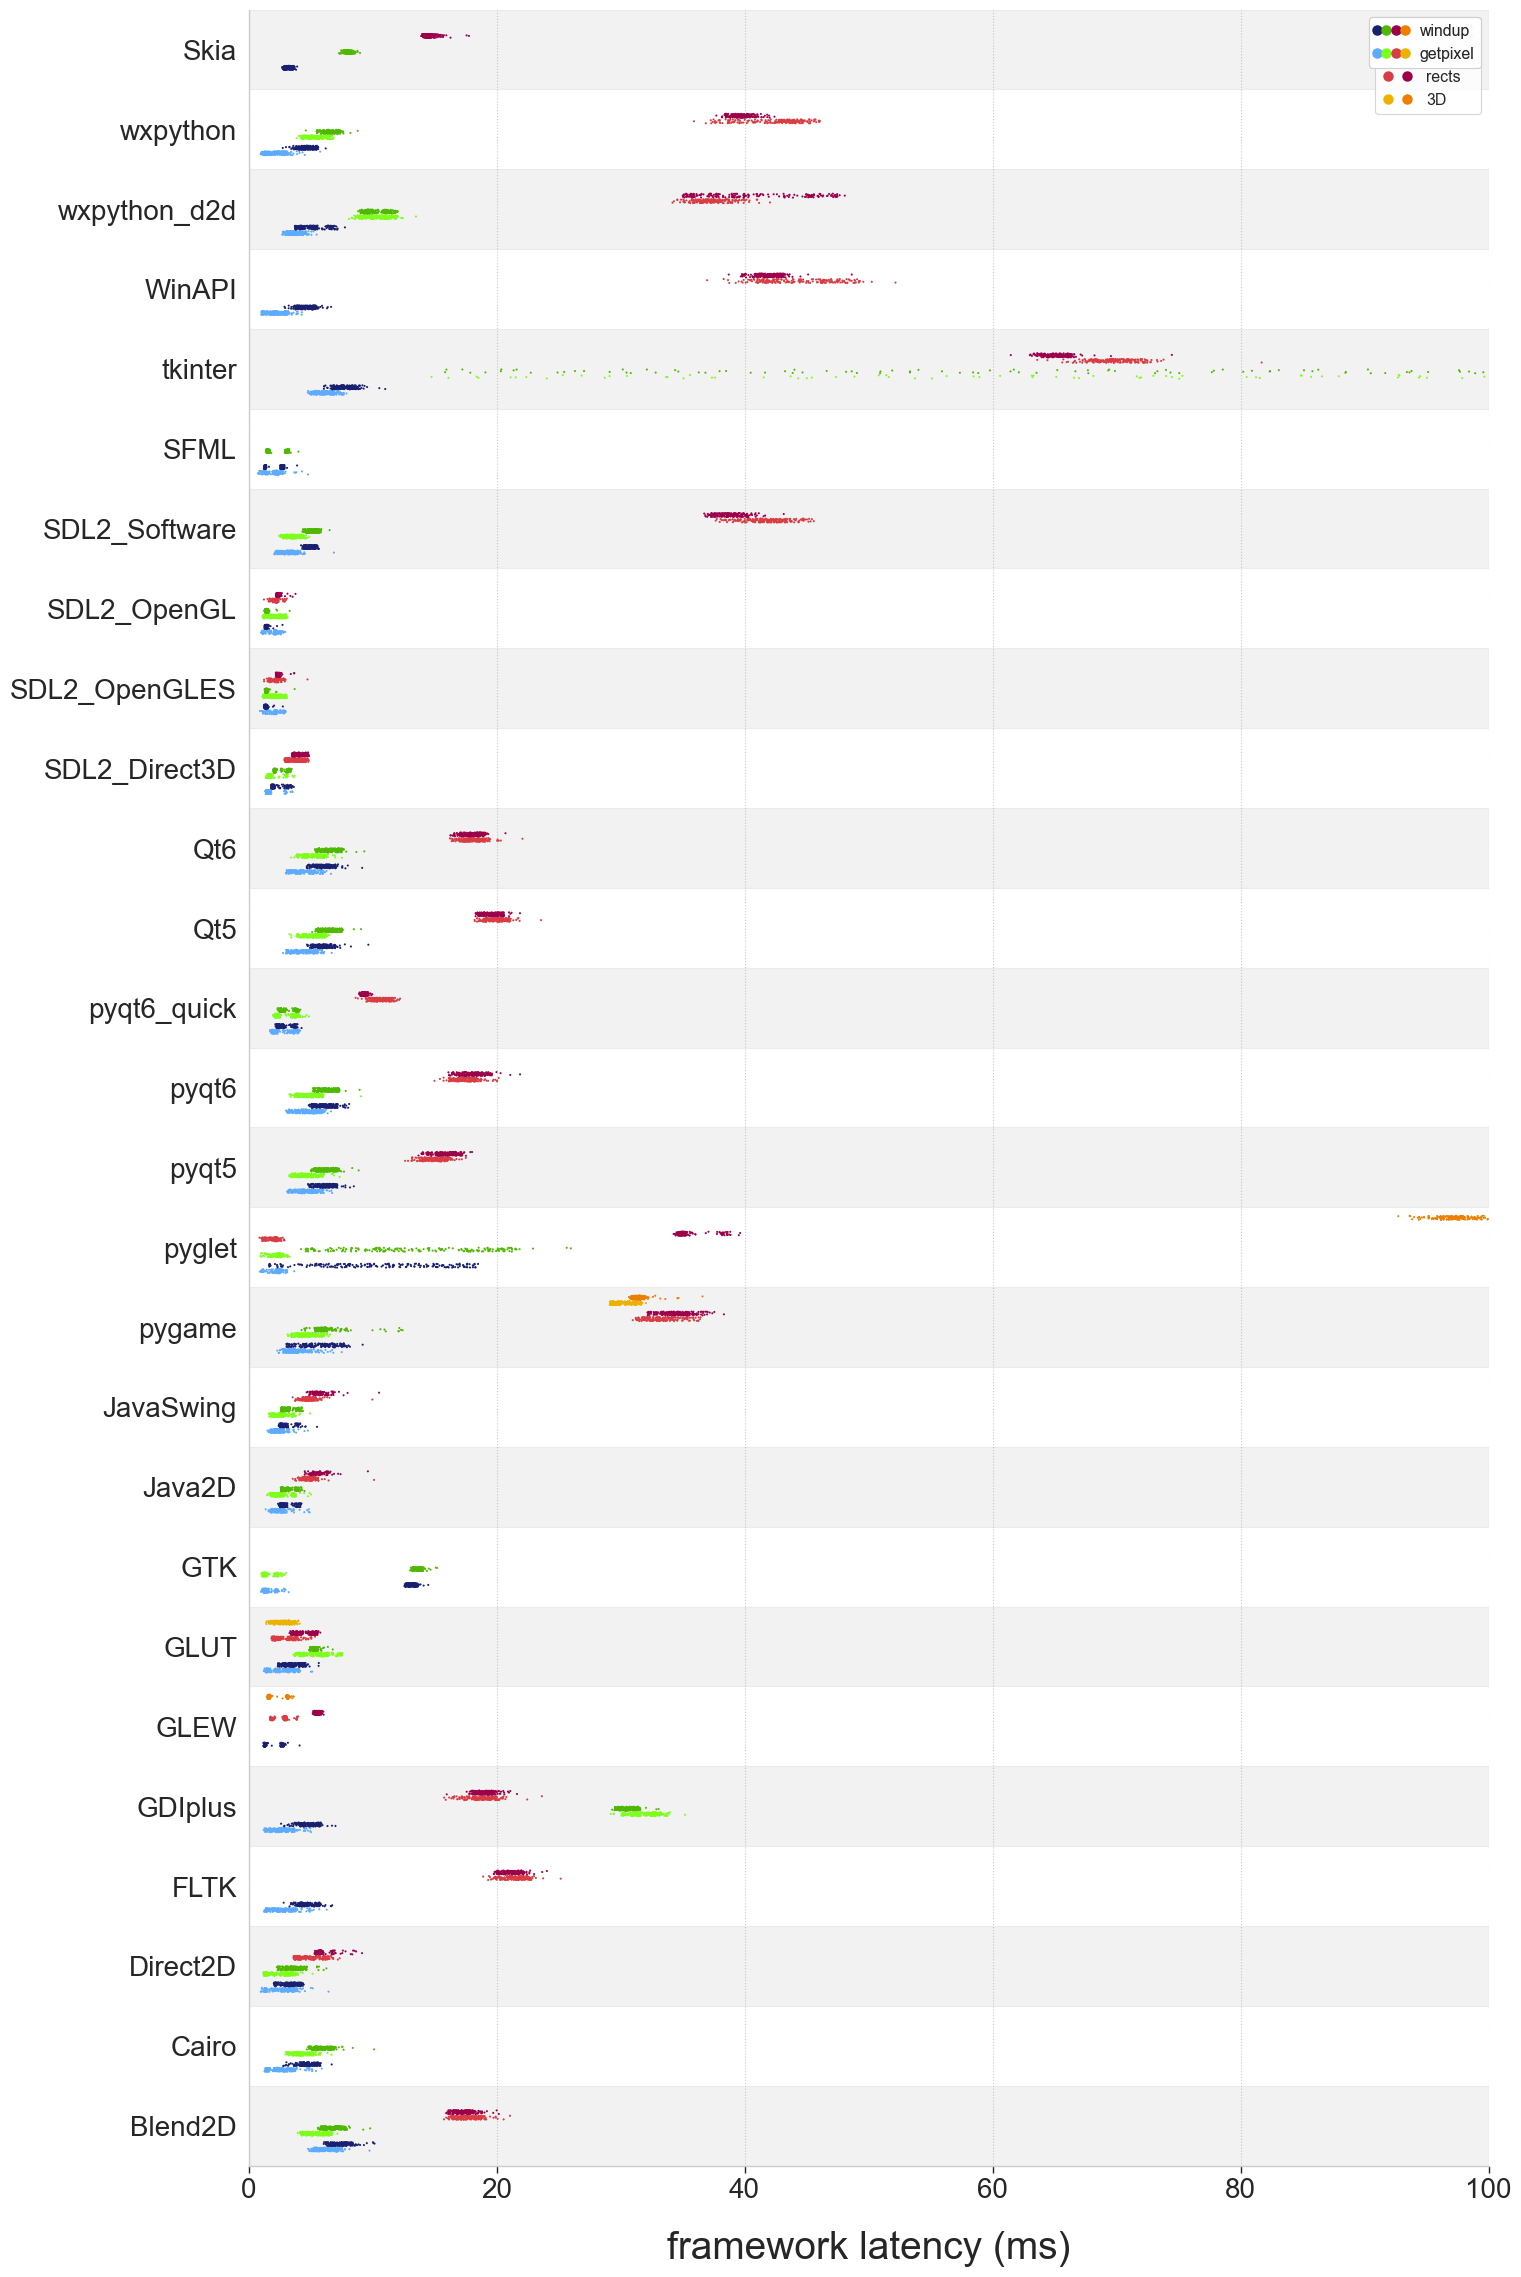

In [40]:
data_temp = data_cleaned[data_cleaned['complexity'] != '3D']

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(16, 28), "xtick.bottom": True, "grid.linestyle": ":"})

offset = lambda p: transforms.ScaledTranslation(0, p/72., plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_cleaned[data_cleaned['program'] == 'getpixel'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_LIGHT, size=1.5)
sns.stripplot(data=data_cleaned[data_cleaned['program'] == 'windup'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_DARK, size=1.5, transform=offset(0.05)+trans)

# stripped background
for i in range(len(data_cleaned['framework'].unique())):
    if i % 2 == 0:
        plot.axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
plot.set_ylim(-0.5, len(data_cleaned['framework'].unique()) - 0.5)

# increase label size
plot.set_xlabel('framework latency (ms)', fontsize=28)
plot.xaxis.labelpad = 20
plot.set_ylabel('')

plot.set_xlim(left=0, right=100)
plot.tick_params(axis='both', labelsize=20)
plt.legend(title='', fontsize=20, loc='upper right')

# todo: legend
handles, labels = plot.get_legend_handles_labels()
print(handles)
print(labels)

handles_getpixel = (handles[0], handles[1], handles[2], handles[3])
handles_windup = (handles[4], handles[5], handles[6], handles[7])

handles_default = (handles[0], handles[4])
handles_image = (handles[1], handles[5])
handles_rects = (handles[2], handles[6])
handles_3d = (handles[3], handles[7])

condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=5., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)})
program_legend = plot.legend([handles_windup, handles_getpixel], ['windup', 'getpixel'], markerscale=5., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)})
plt.gca().add_artist(condition_legend)
plt.gca().add_artist(program_legend)

sns.despine(bottom = False, left = False)

[<matplotlib.lines.Line2D object at 0x0000027693DFAE10>, <matplotlib.lines.Line2D object at 0x0000027695BBBF80>, <matplotlib.lines.Line2D object at 0x0000027693A897C0>, <matplotlib.lines.Line2D object at 0x0000027695BBA810>, <matplotlib.lines.Line2D object at 0x0000027695B07260>, <matplotlib.lines.Line2D object at 0x0000027695D24B90>, <matplotlib.lines.Line2D object at 0x0000027695BBA420>, <matplotlib.lines.Line2D object at 0x0000027695B7C8F0>]
['default', 'image', 'rects', '3D', 'default', 'image', 'rects', '3D']


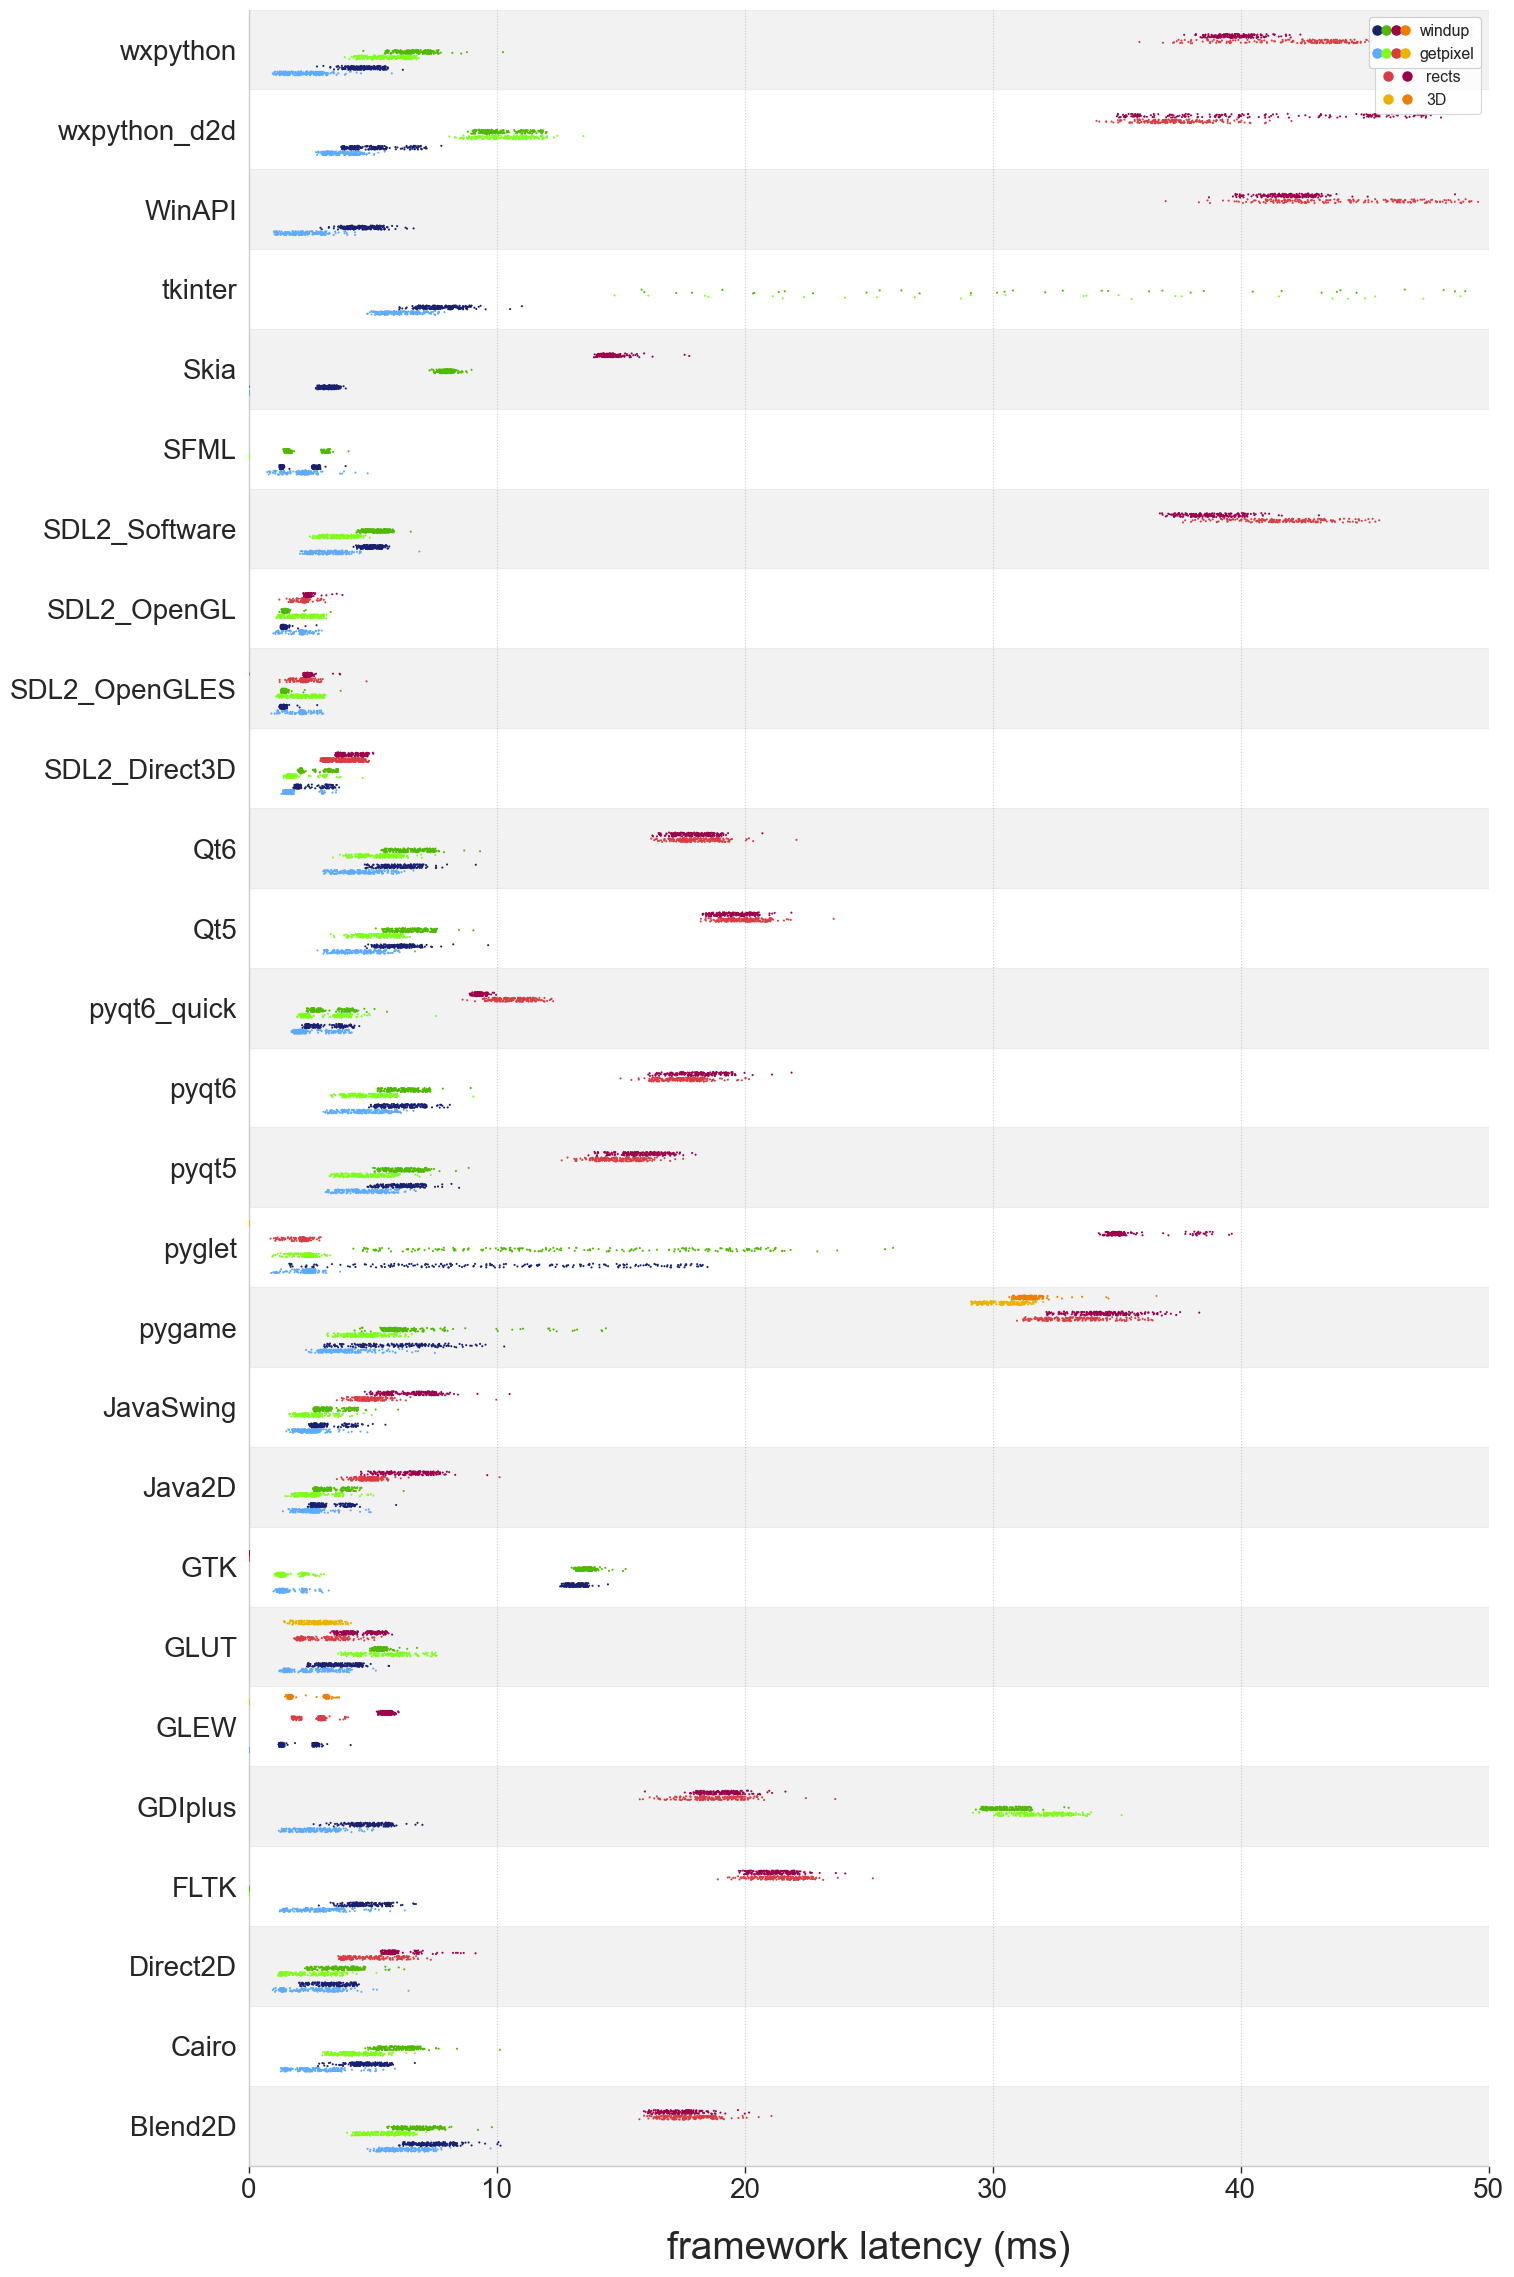

In [44]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(16, 28), "xtick.bottom": True, "grid.linestyle": ":"})

offset = lambda p: transforms.ScaledTranslation(0, p/72., plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data[data['program'] == 'getpixel'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_LIGHT, size=1.5)
sns.stripplot(data=data[data['program'] == 'windup'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_DARK, size=1.5, transform=offset(0.05)+trans)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        plot.axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
plot.set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# increase label size
plot.set_xlabel('framework latency (ms)', fontsize=28)
plot.xaxis.labelpad = 20
plot.set_ylabel('')

plot.set_xlim(left=0, right=50)
plot.tick_params(axis='both', labelsize=20)
plt.legend(title='', fontsize=20, loc='upper right')

# todo: legend
handles, labels = plot.get_legend_handles_labels()
print(handles)
print(labels)

handles_getpixel = (handles[0], handles[1], handles[2], handles[3])
handles_windup = (handles[4], handles[5], handles[6], handles[7])

handles_default = (handles[0], handles[4])
handles_image = (handles[1], handles[5])
handles_rects = (handles[2], handles[6])
handles_3d = (handles[3], handles[7])

condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=5., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)})
program_legend = plot.legend([handles_windup, handles_getpixel], ['windup', 'getpixel'], markerscale=5., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)})
plt.gca().add_artist(condition_legend)
plt.gca().add_artist(program_legend)

sns.despine(bottom = False, left = False)

In [10]:
# data_temp = data_cleaned[data_cleaned['complexity'] != '3D']

# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(20, 18), "xtick.bottom": True, "grid.linestyle": ":"})

# offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
# trans = plt.gca().transData

# plot = sns.stripplot(data=data_cleaned[data_cleaned['program'] == 'getpixel'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_LIGHT, size=2)
# sns.stripplot(data=data_cleaned[data_cleaned['program'] == 'windup'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_DARK, transform=offset(0.07)+trans, size=2)

# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.axes.set_ylim(bottom=0)

# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         plot.axvspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# plot.set_xlim(-0.5, len(data['framework'].unique()) - 0.5)

# # increase label size
# plot.set_ylabel('framework latency (ms)', fontsize=28)
# plot.yaxis.labelpad = 20
# plot.set_xlabel('')

# # todo: legend
# # handles, labels = plot.get_legend_handles_labels()
# # print(handles)
# # print(labels)

# # handles_getpixel = (handles[0], handles[1], handles[2], handles[3])
# # handles_windup = (handles[4], handles[5], handles[6], handles[7])

# # handles_default = (handles[0], handles[4])
# # handles_image = (handles[1], handles[5])
# # handles_rects = (handles[2], handles[6])
# # handles_3d = (handles[3], handles[7])

# # condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})
# # program_legend = plot.legend([handles_windup, handles_getpixel], ['windup', 'getpixel'], markerscale=5., handler_map={tuple: HandlerTuple(ndivide=None)})
# # plt.gca().add_artist(condition_legend)
# # plt.gca().add_artist(program_legend)

# plot.set_title('framework latency')
# sns.despine(bottom = False, left = False)

In [11]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(20, 7), "xtick.bottom": True, "grid.linestyle": ":"})
# plt.rcParams["figure.autolayout"] = True

# offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
# trans = plt.gca().transData

# plot = sns.stripplot(data=data[data['program'] == 'getpixel'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette='blend:cyan,darkblue', size=1, jitter=True)
# sns.stripplot(data=data[data['program'] == 'windup'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette='blend:orangered,darkred', transform=offset(0.05)+trans, size=1)

# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.axes.set_ylim(0, 50)



# # yticks = [0, 10, 20, 30, 40, 50, 100, 500, 1000]
# # plot.set_yticks(range(len(yticks)))
# # plot.set_yticklabels(yticks)

# from matplotlib.ticker import FixedLocator, FixedFormatter
# # Define the custom y-tick values and labels
# small_tick_values = np.arange(0, 50, 10)  # Small steps from 0 to 5
# large_tick_values = np.arange(50, 350, 100)  # Larger steps from 10 to 30

# # Combine the tick values
# tick_values = np.concatenate([small_tick_values, large_tick_values])

# # Create evenly spaced positions for these ticks
# # tick_positions = np.linspace(0, 300, len(tick_values))
# num_ticks = len(tick_values)
# tick_positions = np.linspace(0, 1, num_ticks) * (max(tick_values) - min(tick_values)) + min(tick_values)

# # Set the custom y-ticks using FixedLocator and FixedFormatter
# plot.get_yaxis().set_major_locator(FixedLocator(tick_positions))
# plot.get_yaxis().set_major_formatter(FixedFormatter(tick_values))



# handles, labels = plot.get_legend_handles_labels()
# print(handles)
# print(labels)

# handles_getpixel = (handles[0], handles[1], handles[2], handles[3])
# handles_windup = (handles[4], handles[5], handles[6], handles[7])

# handles_default = (handles[0], handles[4])
# handles_image = (handles[1], handles[5])
# handles_rects = (handles[2], handles[6])
# handles_3d = (handles[3], handles[7])

# condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})
# program_legend = plot.legend([handles_windup, handles_getpixel], ['windup', 'getpixel'], markerscale=5., handler_map={tuple: HandlerTuple(ndivide=None)})
# plt.gca().add_artist(condition_legend)
# plt.gca().add_artist(program_legend)

# plot.set_title('framework latency')
# sns.despine(bottom = False, left = False)

In [12]:
# # fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))

# plt.figure(figsize=(10, 28))

# plot = sns.stripplot(data=data_cleaned[data_cleaned['complexity'] == 'default'], x='fw', y='framework', hue='program', size=1.5, dodge=True, hue_order=['getpixel', 'windup'], palette=[COLOR_BLUE, COLOR_DARKBLUE], alpha=0.3, legend=False, zorder=1)
# plot = sns.pointplot(data=data_cleaned[data_cleaned['complexity'] == 'default'], x='fw', y='framework', hue='program', hue_order=['getpixel', 'windup'], palette=[COLOR_BLUE, COLOR_DARKBLUE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# plot.set_xlabel('framework latency (ms)\nfor condition DEFAULT', fontsize=28)
# plot.xaxis.labelpad = 20
# plot.set_ylabel('')

# plot.set_xlim(left=0)

# plot.tick_params(axis='both', labelsize=20)
# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         plot.axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# plot.set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

In [13]:
# # fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))

# plt.figure(figsize=(10, 28))

# plot = sns.stripplot(data=data_cleaned[data_cleaned['complexity'] == 'image'], x='fw', y='framework', hue='program', size=1.5, dodge=True, hue_order=['getpixel', 'windup'], palette=[COLOR_GREEN, COLOR_DARKGREEN], alpha=0.3, legend=False, zorder=1)
# plot = sns.pointplot(data=data_cleaned[data_cleaned['complexity'] == 'image'], x='fw', y='framework', hue='program', hue_order=['getpixel', 'windup'], palette=[COLOR_GREEN, COLOR_DARKGREEN], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# plot.set_xlabel('framework latency (ms)\nfor condition IMAGE', fontsize=28)
# plot.xaxis.labelpad = 20
# plot.set_ylabel('')

# plot.set_xlim(left=0)

# plot.tick_params(axis='both', labelsize=20)
# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         plot.axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# plot.set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

In [14]:
# # fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))

# plt.figure(figsize=(10, 28))

# plot = sns.stripplot(data=data_cleaned[data_cleaned['complexity'] == 'rects'], x='fw', y='framework', hue='program', size=1.5, dodge=True, hue_order=['getpixel', 'windup'], palette=[COLOR_GLUTROT, COLOR_HEIDENELKE], alpha=0.3, legend=False, zorder=1)
# plot = sns.pointplot(data=data_cleaned[data_cleaned['complexity'] == 'rects'], x='fw', y='framework', hue='program', hue_order=['getpixel', 'windup'], palette=[COLOR_GLUTROT, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# plot.set_xlabel('framework latency (ms)\nfor condition RECTS', fontsize=28)
# plot.xaxis.labelpad = 20
# plot.set_ylabel('')

# plot.set_xlim(left=0, right=80)

# plot.tick_params(axis='both', labelsize=20)
# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         plot.axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# plot.set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

In [15]:
# # fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))

# plt.figure(figsize=(10, 6))

# plot = sns.stripplot(data=data_cleaned[data_cleaned['complexity'] == '3D'], x='fw', y='framework', hue='program', size=1.5, dodge=True, hue_order=['getpixel', 'windup'], palette=[COLOR_OCKER, COLOR_OCKER_ANDI], alpha=0.4, legend=False, zorder=1)
# plot = sns.pointplot(data=data_cleaned[data_cleaned['complexity'] == '3D'], x='fw', y='framework', hue='program', hue_order=['getpixel', 'windup'], palette=[COLOR_OCKER, COLOR_OCKER_ANDI], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# plot.set_xlabel('framework latency (ms)\nfor condition 3D', fontsize=28)
# plot.xaxis.labelpad = 20
# plot.set_ylabel('')

# plot.set_xlim(left=0, right=150)

# plot.tick_params(axis='both', labelsize=20)
# # stripped background
# for i in range(len(data_cleaned[data_cleaned['complexity'] == '3D']['framework'].unique())):
#     if i % 2 == 0:
#         plot.axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# plot.set_ylim(-0.5, len(data_cleaned[data_cleaned['complexity'] == '3D']['framework'].unique()) - 0.5)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

In [16]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(15, 5), "xtick.bottom": True, "grid.linestyle": ":"})

# data_temp = data_cleaned[data_cleaned['complexity'] == 'default']
# plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel'], dodge=True, palette=f'blend:{COLOR_BLUE},{COLOR_DARKBLUE}', size=2)

# plot.set_ylabel('framework latency (ms)', fontsize=14)
# plot.yaxis.labelpad = 20
# plot.set_xlabel('')

# plot.set_ylim(bottom=0)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# # #plot.set_title('framework latency for complexity DEFAULT')
# sns.despine(bottom = False, left = False)

In [17]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(15, 5), "xtick.bottom": True, "grid.linestyle": ":"})

# data_temp = data[data['complexity'] == 'image']
# plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel'], dodge=True, palette='blend:lawngreen,forestgreen', size=2)

# plot.set_ylim(0, 20)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.set_title('framework latency for complexity IMAGE')
# sns.despine(bottom = False, left = False)

In [18]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(15, 5), "xtick.bottom": True, "grid.linestyle": ":"})

# data_temp = data[data['complexity'] == 'rects']
# plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel'], dodge=True, palette='blend:orangered,darkred', size=2)



# plot.set_ylim(0, 300)
# # plot.set_yticks([0, 10, 20, 30, 50, 100, 200, 300])
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.set_title('framework latency for complexity RECTS')
# sns.despine(bottom = False, left = False)

In [19]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(5, 5), "xtick.bottom": True, "grid.linestyle": ":"})

# data_temp = data[data['complexity'] == '3D']
# plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel'], dodge=True, palette='blend:lawngreen,forestgreen', size=2)

# plot.set_ylim(0, 150)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.set_title('framework latency for complexity 3D')
# sns.despine(bottom = False, left = False)

In [20]:
# data_temp = pd.concat([data, data_original[data_original['program'] == 'none']])
# plot = sns.stripplot(data=data_temp, x='framework', y='ete_upper', hue='program', size=2, dodge=True, palette=[COLOR_BLUE, COLOR_GLUTROT, COLOR_NONE])
# plot.axes.set_ylim(0, 300)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# data_temp

In [21]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(25, 10), "xtick.bottom": True, "grid.linestyle": ":"})

# plot = sns.stripplot(data=data[data['program'] != 'none'], x='framework', y='diff', hue='program', size=2, dodge=True, palette=[COLOR_BLUE, COLOR_GLUTROT])
# # plot = sns.boxplot(data=data[data['program'] != 'none'], x='framework', y='diff', hue='program', hue_order=['getpixel', 'bitblt', 'getdbits', 'windup'], dodge=True, palette=['red', 'orange', 'darkred', 'blue'])
# plot.axes.set_ylim(-25, 50)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 86.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 85.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppDa

C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppDa

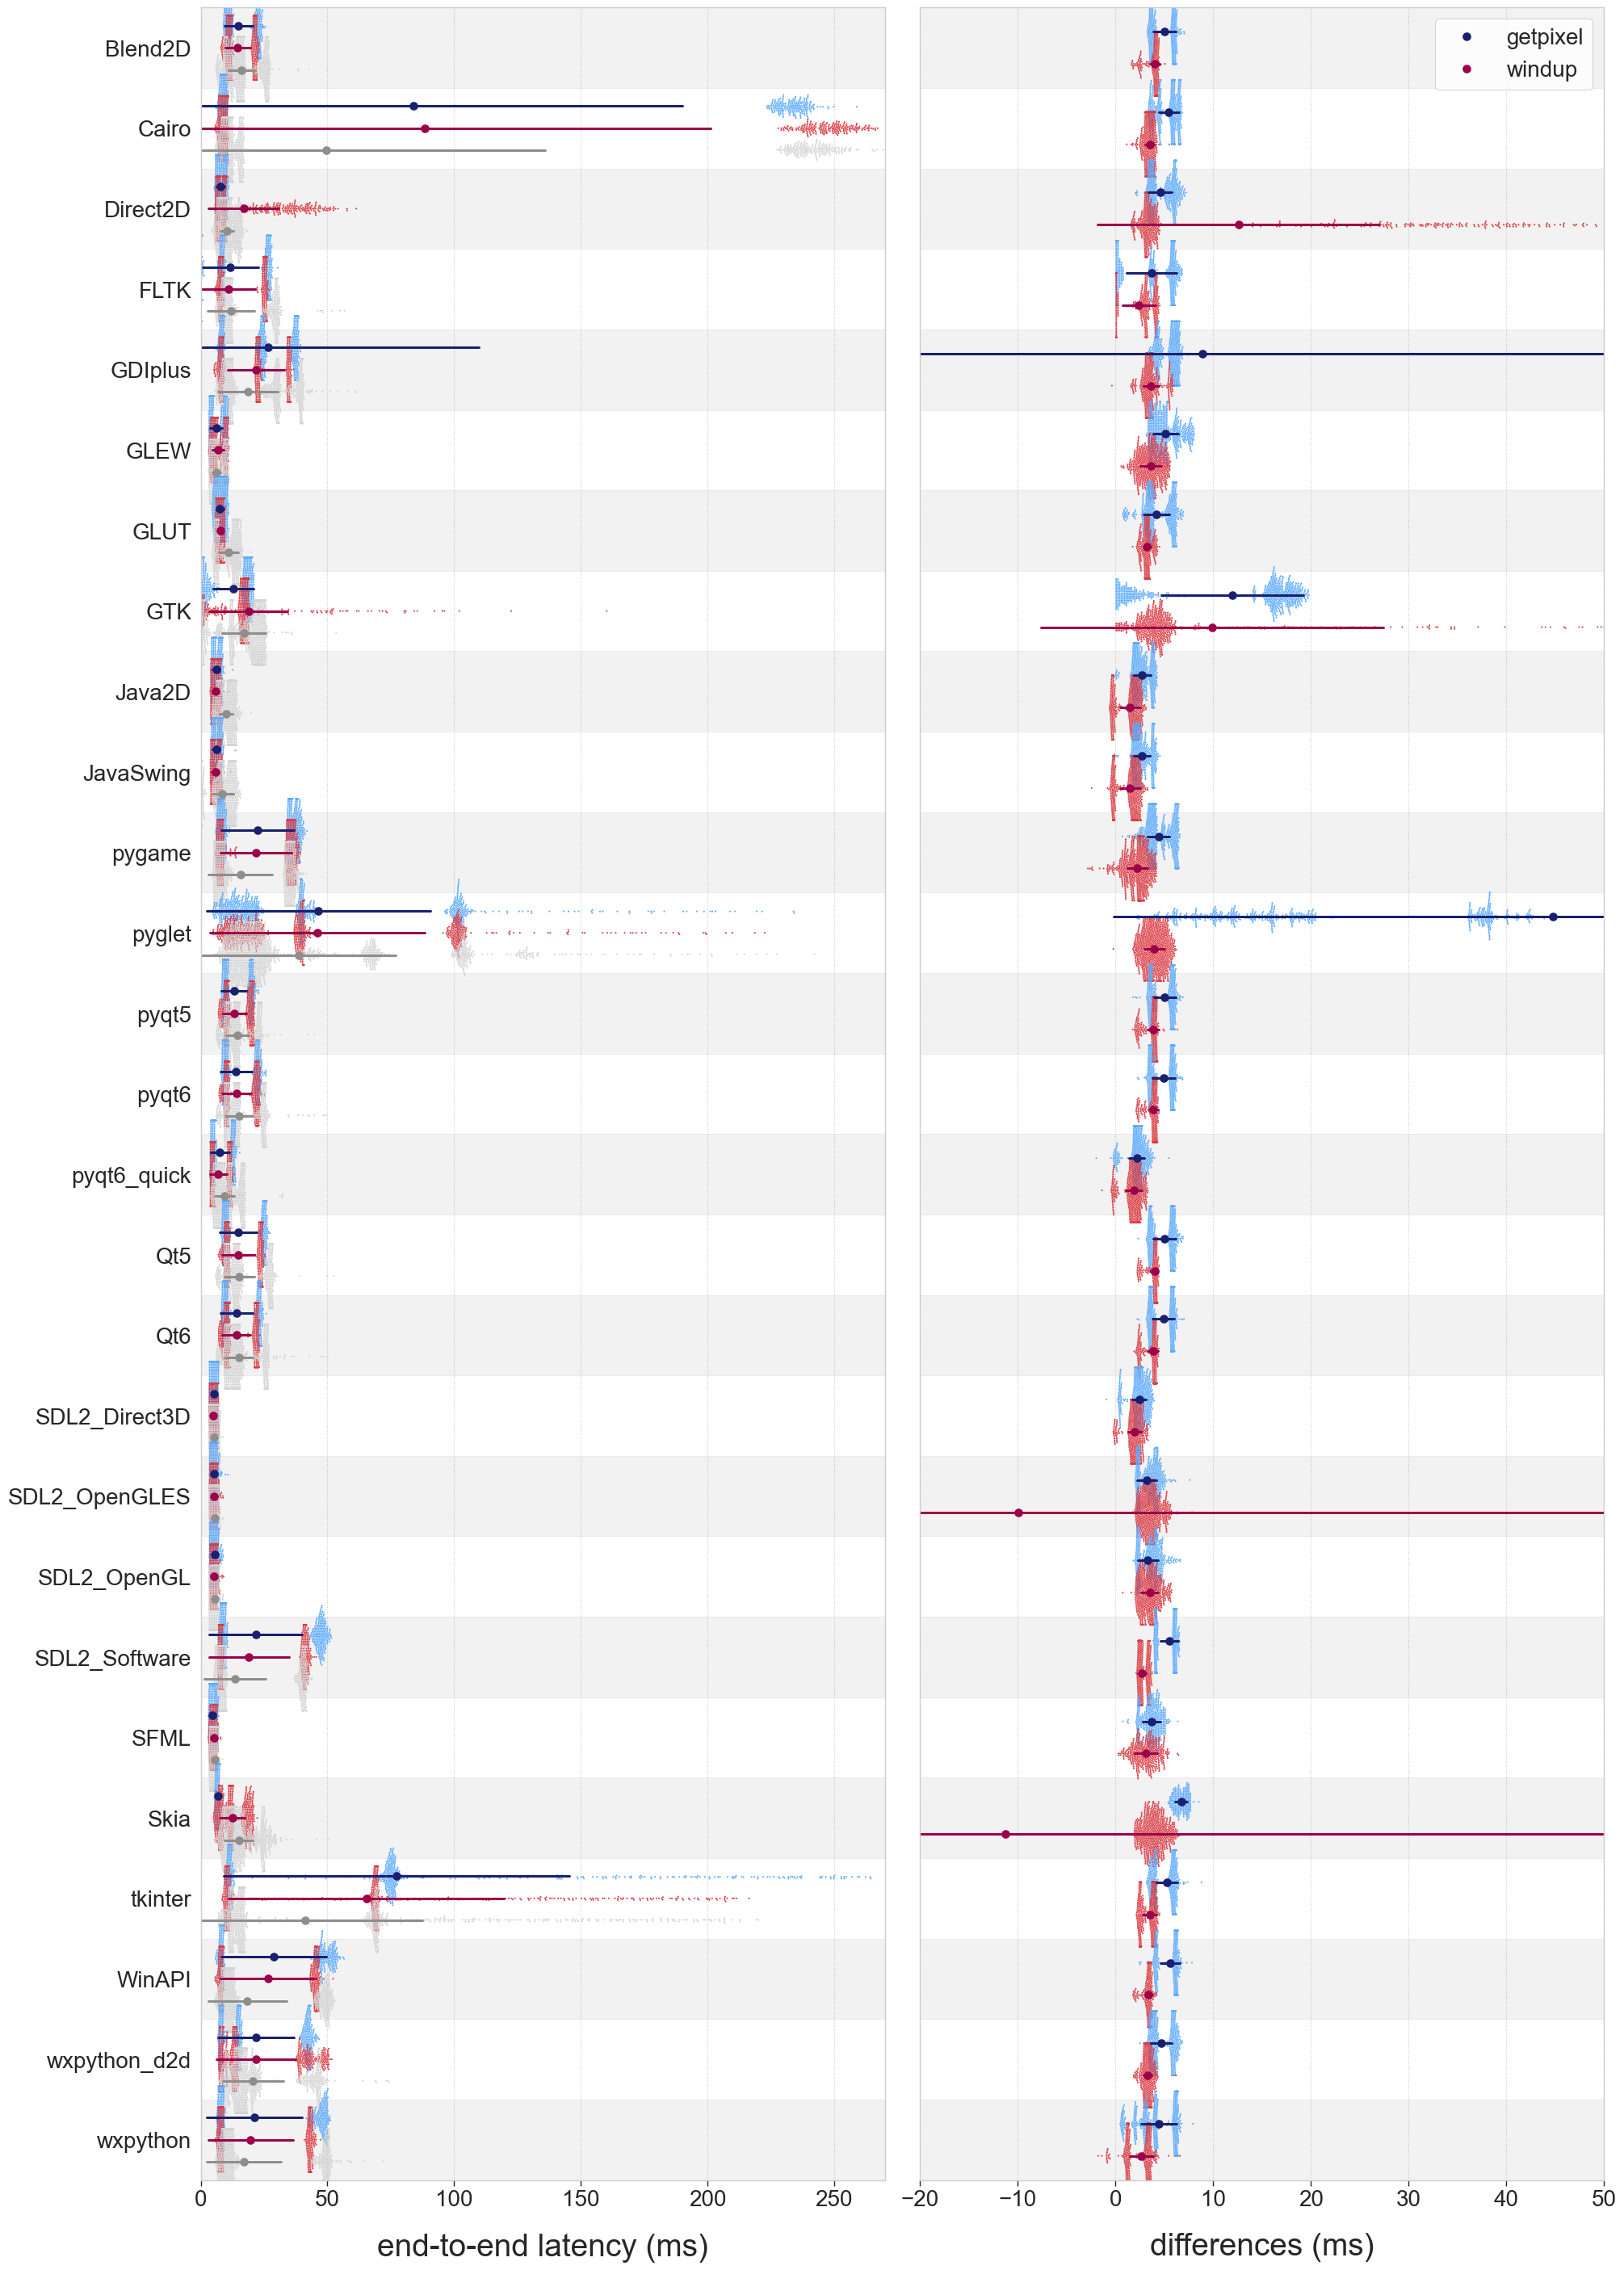

In [39]:
data_temp = pd.concat([data, data_original[data_original['program'] == 'none']])

fig, axs = plt.subplots(1, 2, layout='constrained', sharex=False, sharey=True, figsize=(20, 28))
axs[0].tick_params(axis='both', labelsize=20)
axs[1].tick_params(axis='both', labelsize=20)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data_temp, x='ete_upper', y='framework', hue='program', size=1.5, dodge=0.8, hue_order=['getpixel', 'windup', 'none'], palette=[COLOR_BLUE, COLOR_GLUTROT, 'lightgrey'], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data, x='diff', y='framework', hue='program', size=1.5, dodge=0.6, hue_order=['getpixel', 'windup'], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data_temp, x='ete_upper', y='framework', hue='program', hue_order=['getpixel', 'windup', 'none'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE, COLOR_NONE], legend=False, dodge=0.55, join=False, errorbar='sd', markersize=6, zorder=2)
plot = sns.pointplot(ax=axs[1], data=data, x='diff', y='framework', hue='program', hue_order=['getpixel', 'windup'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
axs[1].set_xlabel('differences (ms)', fontsize=28)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[0].set_ylabel('')

axs[0].set_xlim(0, 270)
axs[1].set_xlim(-20, 50)

plt.legend(title='', fontsize=20, loc='upper right')

# plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')